# Wang algebra \- undirected graph



### user provides undirected graph



Defining a, b, c, d, e, f


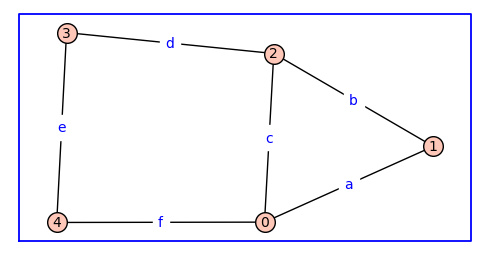

In [1]:
# Construct Wang ring S with indeterminants corresponding to edges of G
way = 1
if way == 1:
    R=PolynomialRing(GF(2),names=['a','b','c','d','e','f'],order='invlex')
    R.inject_variables()
    dG = {0: {1:a, 2:c, 4:f}, 1: {2:b}, 2: {3:d}, 3: {4:e}} # House graph
    G = Graph(dG,weighted=True)
else: # way 2 
    #G = graphs.HouseGraph()
    #G = graphs.PetersenGraph()
    G = graphs.CompleteGraph(5)
    R = PolynomialRing(GF(2), ['e%s%s'%(edge[0],edge[1]) for edge in G.edges()]) # over F2
    R.inject_variables()
    for edge in G.edges(sort=True):
        G.set_edge_label(edge[0],edge[1],R('e%s%s'%(edge[0],edge[1])))
G.show(edge_labels=True,figsize=5,graph_border=True)

### code should be autonomous from here

In [2]:
def shorten(t,max=20,prefix=4,suffix=4):
    if len(t.monomials())<=max:
        return str(t)
    else:
        return str(sum(t.monomials()[:prefix])) + '+ ... +' + str(sum(t.monomials()[-suffix:]))

In [3]:
# Construct Wang ring S with indeterminants corresponding to edges of G
I = R.ideal([ e^2 for e in R.gens() ])
S = R.quotient(I,names=list(R.gens()))
S.inject_variables(verbose=0)
print('S is', S)

S is Quotient of Multivariate Polynomial Ring in a, b, c, d, e, f over Finite Field of size 2 by the ideal (a^2, b^2, c^2, d^2, e^2, f^2)


In [4]:
# Construct polynomial corresonding to edges adjacent to each vertex
h=[]
for v in G.vertices(sort=True):
    h0 = S(0)
    for u in G.neighbors(v):
        h0 += G.edge_label(v,u)
    h.append(h0)
    print(v,':',h0)

0 : f + c + a
1 : b + a
2 : d + c + b
3 : e + d
4 : f + e


In [5]:
# Calculate products of these polynomials in Wang ring S
hprod = [1]
for v in range(G.order()):
    hprod.append(hprod[-1]*h[v])
    print(v,':',shorten(hprod[-1],10,2,2))

0 : f + c + a
1 : b*f + a*f + b*c + a*c + a*b
2 : b*d*f + a*d*f + b*c*f + a*c*f + a*b*f + b*c*d + a*c*d + a*b*d
3 : b*d*e*f + a*d*e*f+ ... +a*c*d*e + a*b*d*e
4 : 0


In [6]:
t = hprod[-2]
print('tree polynomial of G has', len(t.monomials()), 'terms\n')
print(shorten(t,20,4,4))

tree polynomial of G has 11 terms

b*d*e*f + a*d*e*f + b*c*e*f + a*c*e*f + a*b*e*f + b*c*d*f + a*c*d*f + a*b*d*f + b*c*d*e + a*c*d*e + a*b*d*e


In [7]:
G0 = copy(G)
G0.weighted(False)
G0.spanning_trees_count() == len(t.monomials())

True

In [8]:
print(G.spanning_trees_count()) # this sometimes works 

b*d*e*f + a*d*e*f + b*c*e*f + a*c*e*f + a*b*e*f + b*c*d*f + a*c*d*f + a*b*d*f + b*c*d*e + a*c*d*e + a*b*d*e


#### 

<class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>